# 量化金融專案實作 - 金融時間序列資料應用
  - 大綱簡介: 透過前幾章學習到之資料處理及作圖內容對金融時間序列資料進行進一步的應用。


In [3]:
pip install tejapi 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 2.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import tejapi 
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
tejapi.ApiConfig.api_key = "JlvqFjwHb6nVQ1Qj3pfGEjVOEnwZp6"

tejapi.ApiConfig.ignoretz = True

In [42]:
tejapi.ApiConfig.info()

{'key': 'JlvqFjwHb6nVQ1Qj3pfGEjVOEnwZp6',
 'user': {'userId': 11,
  'shortName': 'TRIAL',
  'name': '試用帳號清單',
  'subscritionStartDate': '2018-09-03',
  'subscritionEndDate': '2099-12-31',
  'maxKey': 1,
  'tables': {'TRAIL/TAOFCAN': {'tableId': 'TRAIL/TAOFCAN',
    'startUsageDate': '2019-01-11',
    'endUsageDate': '2099-12-31',
    'dataStartYear': 2018,
    'dataEndYear': 9999,
    'allowColumns': [],
    'conditions': ''},
   'TRAIL/TAGIN': {'tableId': 'TRAIL/TAGIN',
    'startUsageDate': '2019-01-11',
    'endUsageDate': '2099-12-31',
    'dataStartYear': 2018,
    'dataEndYear': 9999,
    'allowColumns': [],
    'conditions': ''},
   'TRAIL/TAOFIVA': {'tableId': 'TRAIL/TAOFIVA',
    'startUsageDate': '2019-01-11',
    'endUsageDate': '2099-12-31',
    'dataStartYear': 2018,
    'dataEndYear': 9999,
    'allowColumns': [],
    'conditions': ''},
   'TRAIL/TAOPTION': {'tableId': 'TRAIL/TAOPTION',
    'startUsageDate': '2019-01-11',
    'endUsageDate': '2099-12-31',
    'dataStartYe

In [43]:
TSMC  = tejapi.get('TRAIL/TAPRCD', 
            coid = '2330')

## 1. 技術面指標製作

In [110]:
TSMC  = tejapi.get(
            'TRAIL/TAPRCD', 
            coid = '2330',
            mdate={'gte':'2023-09-01', 'lte':'2024-02-01'}, 
            opts={'columns': ['mdate','open_d','high_d','low_d','close_d']}, 
            paginate=True)

In [111]:
TSMC = TSMC.set_index('mdate')
TSMC

,open_d,high_d,low_d,close_d
mdate,,,,
2023-09-01,543.0,553.0,543.0,548.0
2023-09-04,549.0,557.0,549.0,557.0
2023-09-05,553.0,555.0,550.0,552.0
2023-09-06,556.0,556.0,550.0,550.0
2023-09-07,546.0,548.0,542.0,542.0
...,...,...,...,...
2023-12-25,582.0,585.0,580.0,581.0
2023-12-26,583.0,586.0,582.0,586.0
2023-12-27,587.0,592.0,586.0,592.0


### 1-1 均價以及K棒圖製作

In [18]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 391.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import date2num, num2date
import matplotlib.ticker as ticker
import matplotlib.dates

https://matplotlib.org/2.1.2/api/finance_api.html

In [47]:
TSMC_date = date2num(TSMC.index)
TSMC_index = [tuple([TSMC_date[i], TSMC.open_d[i], TSMC.high_d[i], TSMC.low_d[i], TSMC.close_d[i]]) for i in range(len(TSMC_date))]

/var/folders/ps/jckt3n_j4xv4kbs3f_1mmc740000gn/T/ipykernel_36185/2171855920.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TSMC_index = [tuple([TSMC_date[i], TSMC.open_d[i], TSMC.high_d[i], TSMC.low_d[i], TSMC.close_d[i]]) for i in range(len(TSMC_date))]


In [109]:
TSMC_index

[(19601.0, 543.0, 553.0, 543.0, 548.0),
 (19604.0, 549.0, 557.0, 549.0, 557.0),
 (19605.0, 553.0, 555.0, 550.0, 552.0),
 (19606.0, 556.0, 556.0, 550.0, 550.0),
 (19607.0, 546.0, 548.0, 542.0, 542.0),
 (19608.0, 535.0, 540.0, 535.0, 539.0),
 (19611.0, 539.0, 540.0, 536.0, 536.0),
 (19612.0, 536.0, 545.0, 536.0, 544.0),
 (19613.0, 545.0, 548.0, 541.0, 541.0),
 (19614.0, 544.0, 550.0, 543.0, 550.0),
 (19615.0, 549.0, 558.0, 547.0, 558.0),
 (19618.0, 548.0, 549.0, 540.0, 540.0),
 (19619.0, 539.0, 543.0, 538.0, 538.0),
 (19620.0, 536.0, 538.0, 535.0, 535.0),
 (19621.0, 530.0, 531.0, 526.0, 527.0),
 (19622.0, 523.0, 525.0, 522.0, 522.0),
 (19625.0, 522.0, 529.0, 522.0, 525.0),
 (19626.0, 521.0, 524.0, 519.0, 519.0),
 (19627.0, 517.0, 523.0, 516.0, 522.0),
 (19628.0, 523.0, 525.0, 520.0, 523.0),
 (19632.0, 530.0, 534.0, 528.0, 533.0),
 (19633.0, 528.0, 533.0, 528.0, 529.0),
 (19634.0, 521.0, 523.0, 519.0, 520.0),
 (19635.0, 523.0, 529.0, 523.0, 528.0),
 (19636.0, 530.0, 533.0, 529.0, 532.0),


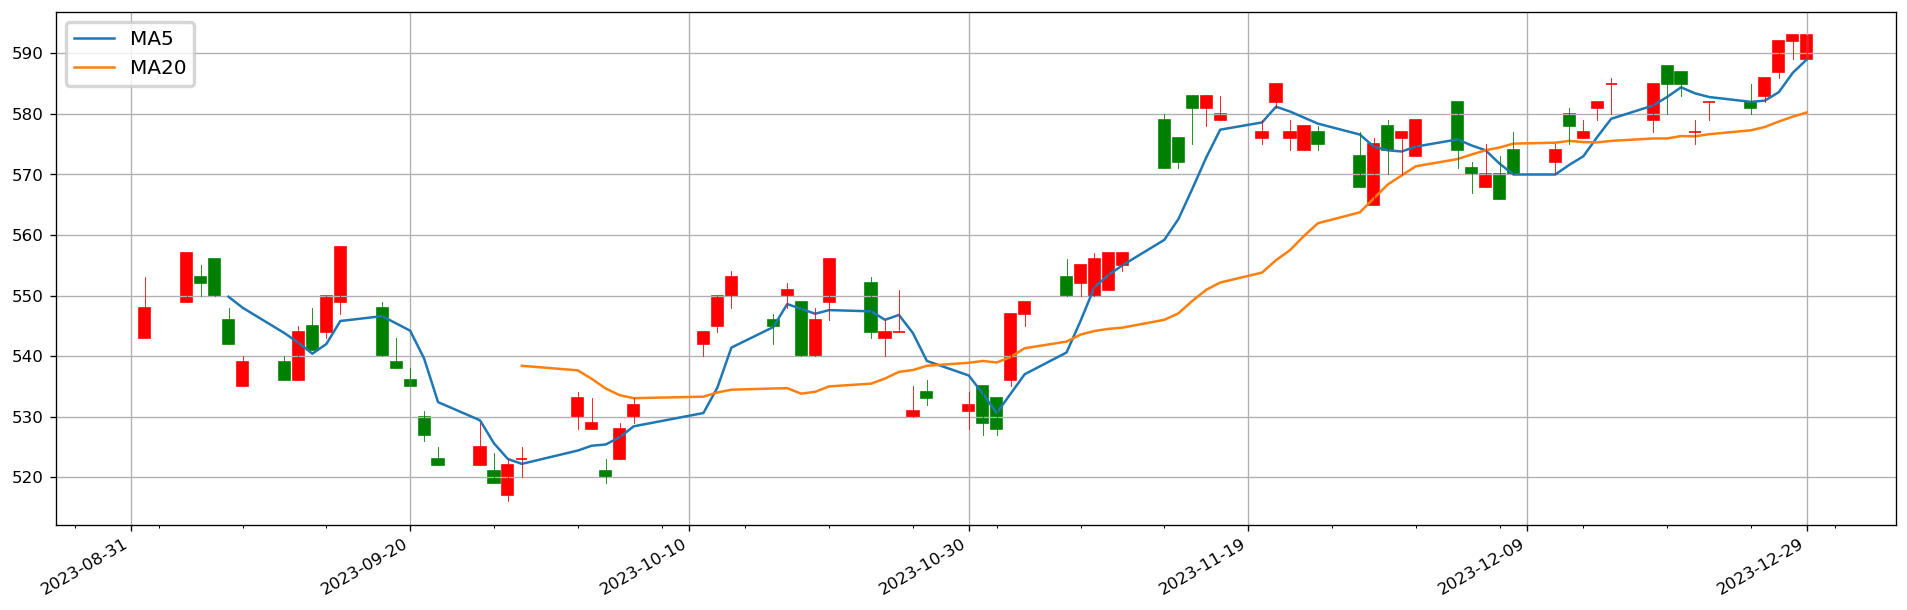

In [54]:
fig, ax = plt.subplots(figsize = (16, 5), dpi = 120)


ax.plot(TSMC_date, TSMC['close_d'].rolling(5).mean(), label = 'MA5')
ax.plot(TSMC_date, TSMC['close_d'].rolling(20).mean(), label = 'MA20')

candlestick_ohlc(ax, TSMC_index, colorup = 'r', colordown = 'g',width= 0.8)

fig.autofmt_xdate()
fig.tight_layout()
legend = ax.legend(fontsize='large', loc='upper left')
legend.get_frame().set_linewidth(2)  # 设置图例边框宽度


ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(6))
ax.grid(True)

### 1-2 MACD

MACD是透過比較兩條長(26)短(12)天數的指數移動平均線(EMA)，相減算出差值(DIF)後，對差值再進行一次指數移動平均線的計算。

- EMA: 跟一般簡單移動平均不同的地方是，越接近當期的資料重要性越高，也因此佔比越高。
- DIF(短): 短期跟長期EMA相減，通常代表短期股價趨勢變化。
- MACD(長): 對DIF再取一次移動平均，通常用以判斷股價大趨勢。

In [55]:
def MACD(DF, a = 12, b = 26, c = 9):
    '''
    簡單移動平均線: rolling
    指數移動平均線: ewm
    指数加权移动平均（Exponential Weighted Moving Average）
    DIF（DIF = EMA_Fast - EMA_Slow）和 MACD（通过对 DIF 进行指数加权移动平均)
    '''
    df = DF.copy()
    df['EMA_Slow'] = df['close_d'].ewm(span = b, min_periods = b).mean()
    df['EMA_Fast'] = df['close_d'].ewm(span = a, min_periods = a).mean()
    df['DIF'] = df['EMA_Fast'] - df['EMA_Slow']
    df['MACD'] = df['DIF'].ewm(span = c, min_periods=c).mean()
    
    return df
    

<Axes: xlabel='mdate'>

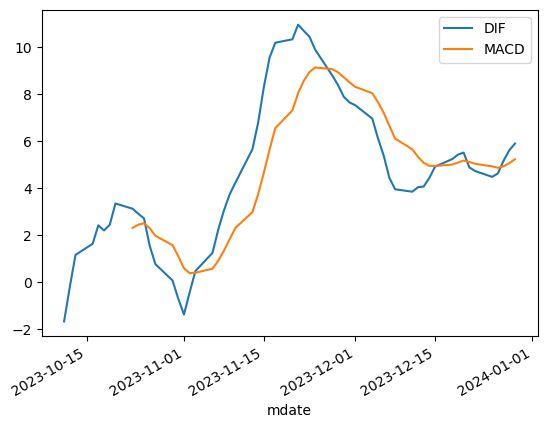

In [56]:
MACD(TSMC)[['DIF', 'MACD']].plot()

### 1-3 ATR

ATR（平均真實區域）主要指股價在一段時間內的真實波動範圍，也就是衡量該標的物之波動性。

- 今日最高價減最低價 
- 今日最高價減昨日收盤價的絕對值
- 今日最低價減昨日收盤價的絕對值

In [57]:
def ATR(DF, n=14):
    '''
    昨日收盤:close.shift()
    '''
    df = DF.copy()
    df['H-L'] = abs(df['high_d'] - df['low_d'])
    df['H-PC'] = abs(df['high_d'] - df['close_d'].shift())
    df['L-PC'] = abs(df['low_d'] - df['close_d'].shift())
    
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1, skipna = False)
    df['ATR'] = df['TR'].ewm(span= n, min_periods = n).mean()
    
    
    return df

<Axes: xlabel='mdate'>

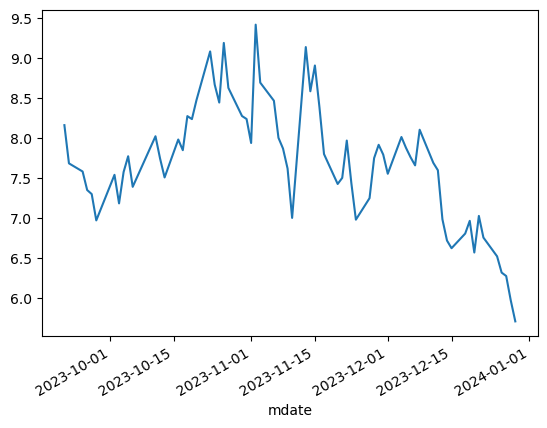

In [59]:
ATR(TSMC)['ATR'].plot()

### 1-4 KD

主要用來呈現過去一段時間的標的物價格強弱趨勢，透過這K、D兩個數值去找出可能的價格轉折點作為交易訊號。

- RSV：(今日Close - 14天內LOW)／(14天內High -14天內Low) * 100
- K值：昨日K*(2/3)＋今日RSV*(1/3)
- D值：昨日D*(2/3)＋今日K*(1/3)

In [80]:
def KD(DF, n = 14):
    '''
    function to calculate KD
    '''
    df = DF.copy()
    df['High_14D'] = df['high_d'].rolling(n).max()
    df['Low_14D'] = df['low_d'].rolling(n).min()
    df['RSV'] = (df['close_d'] - df['Low_14D']) / (df['High_14D'] - df['Low_14D']) * 100
    df = df.dropna()
    
    df['K'] = np.zeros(len(df))
    df['D'] = np.zeros(len(df))
    
    for i in range(len(df)):
        if i == 0:
            df.loc[i, 'K'] = 50
            df.loc[i, 'D'] = 50
        else:
        
            df['K'].iloc[i] = df['K'].iloc[i-1]*(2/3) + df['RSV'].iloc[i]*(1/3)
            df['D'].iloc[i] = df['D'].iloc[i-1]*(2/3) + df['K'].iloc[i]*(1/3)
    
    
    return df

In [71]:
TSMC

,open_d,high_d,low_d,close_d
mdate,,,,
2023-09-01,543.0,553.0,543.0,548.0
2023-09-04,549.0,557.0,549.0,557.0
2023-09-05,553.0,555.0,550.0,552.0
2023-09-06,556.0,556.0,550.0,550.0
2023-09-07,546.0,548.0,542.0,542.0
...,...,...,...,...
2023-12-25,582.0,585.0,580.0,581.0
2023-12-26,583.0,586.0,582.0,586.0
2023-12-27,587.0,592.0,586.0,592.0


<Axes: xlabel='mdate'>

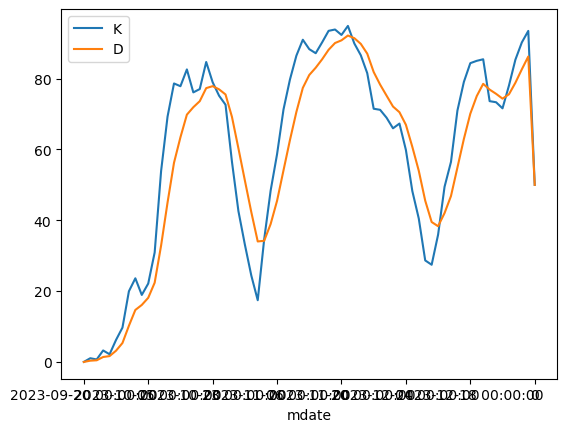

In [82]:
KD(TSMC)[['K','D']].plot()

### 1-5 簡易回測

**交易策略設計：**
- 買入信號：
     - MACD上升 且 K值>70 且 當日K值>前日K值
- 賣出信號：
     - 當日低點<前日收盤 - 前日 ATR

**交易假設：**
買點成立時，我們投入1元新台幣的金額量進行買入直到賣點出現，過程忽略交易手續費、證交稅。

In [83]:
TSMC = MACD(TSMC)
TSMC = ATR(TSMC)
TSMC = KD(TSMC)
TSMC.dropna(inplace = True)

In [84]:
TSMC

,open_d,high_d,low_d,close_d,EMA_Slow,EMA_Fast,DIF,MACD,H-L,H-PC,L-PC,TR,ATR,High_14D,Low_14D,RSV,K,D
mdate,,,,,,,,,,,,,,,,,,
2023-10-23 00:00:00,552.0,553.0,543.0,544.0,540.401747,543.521059,3.119312,2.304974,10.0,3.0,13.0,13.0,9.084829,556.0,519.0,67.567568,0.000000,0.000000
2023-10-24 00:00:00,543.0,546.0,540.0,544.0,540.687619,543.594956,2.907337,2.439938,6.0,2.0,4.0,6.0,8.670323,556.0,519.0,67.567568,22.522523,7.507508
2023-10-25 00:00:00,544.0,551.0,544.0,544.0,540.949373,543.657423,2.708050,2.498600,7.0,7.0,0.0,7.0,8.446115,556.0,519.0,67.567568,37.537538,17.517518
2023-10-26 00:00:00,530.0,535.0,530.0,531.0,540.167017,541.706091,1.539074,2.292534,5.0,9.0,14.0,14.0,9.190946,556.0,523.0,24.242424,33.105833,22.713623
2023-10-27 00:00:00,534.0,536.0,532.0,533.0,539.606006,540.364344,0.758338,1.967845,4.0,5.0,1.0,5.0,8.629335,556.0,529.0,14.814815,27.008827,24.145357
2023-10-30 00:00:00,531.0,534.0,528.0,532.0,539.013124,539.075614,0.062490,1.569243,6.0,1.0,5.0,6.0,8.277226,556.0,528.0,14.285714,22.767789,23.686168
2023-10-31 00:00:00,535.0,535.0,527.0,529.0,538.235622,537.523574,-0.712047,1.096346,8.0,3.0,5.0,8.0,8.240122,556.0,527.0,6.896552,17.477377,21.616571
2023-11-01 00:00:00,533.0,533.0,527.0,528.0,537.443674,536.056854,-1.386820,0.585329,6.0,4.0,2.0,6.0,7.940461,556.0,527.0,3.448276,12.801010,18.678051
2023-11-02 00:00:00,536.0,547.0,535.0,547.0,538.180633,537.741927,-0.438707,0.375804,12.0,19.0,7.0,19.0,9.419252,556.0,527.0,68.965517,31.522512,22.959538


In [94]:
ticker_signal={}
ticker_return = {}
ticker_signal['TSMC'] = ""
ticker_return['TSMC'] = [0]
ret = []

In [96]:
TSMC

,open_d,high_d,low_d,close_d,EMA_Slow,EMA_Fast,DIF,MACD,H-L,H-PC,L-PC,TR,ATR,High_14D,Low_14D,RSV,K,D
mdate,,,,,,,,,,,,,,,,,,
2023-10-23 00:00:00,552.0,553.0,543.0,544.0,540.401747,543.521059,3.119312,2.304974,10.0,3.0,13.0,13.0,9.084829,556.0,519.0,67.567568,0.000000,0.000000
2023-10-24 00:00:00,543.0,546.0,540.0,544.0,540.687619,543.594956,2.907337,2.439938,6.0,2.0,4.0,6.0,8.670323,556.0,519.0,67.567568,22.522523,7.507508
2023-10-25 00:00:00,544.0,551.0,544.0,544.0,540.949373,543.657423,2.708050,2.498600,7.0,7.0,0.0,7.0,8.446115,556.0,519.0,67.567568,37.537538,17.517518
2023-10-26 00:00:00,530.0,535.0,530.0,531.0,540.167017,541.706091,1.539074,2.292534,5.0,9.0,14.0,14.0,9.190946,556.0,523.0,24.242424,33.105833,22.713623
2023-10-27 00:00:00,534.0,536.0,532.0,533.0,539.606006,540.364344,0.758338,1.967845,4.0,5.0,1.0,5.0,8.629335,556.0,529.0,14.814815,27.008827,24.145357
2023-10-30 00:00:00,531.0,534.0,528.0,532.0,539.013124,539.075614,0.062490,1.569243,6.0,1.0,5.0,6.0,8.277226,556.0,528.0,14.285714,22.767789,23.686168
2023-10-31 00:00:00,535.0,535.0,527.0,529.0,538.235622,537.523574,-0.712047,1.096346,8.0,3.0,5.0,8.0,8.240122,556.0,527.0,6.896552,17.477377,21.616571
2023-11-01 00:00:00,533.0,533.0,527.0,528.0,537.443674,536.056854,-1.386820,0.585329,6.0,4.0,2.0,6.0,7.940461,556.0,527.0,3.448276,12.801010,18.678051
2023-11-02 00:00:00,536.0,547.0,535.0,547.0,538.180633,537.741927,-0.438707,0.375804,12.0,19.0,7.0,19.0,9.419252,556.0,527.0,68.965517,31.522512,22.959538


In [98]:
for i in range(1,len(TSMC)):
    
    buy_signal = TSMC['MACD'].iloc[i] > TSMC['MACD'].iloc[i-1] and  TSMC['K'].iloc[i] > 70 and TSMC['K'].iloc[i] > TSMC['K'].iloc[i-1]
    sell_signal = TSMC['low_d'].iloc[i] < (TSMC['close_d'].iloc[i-1] - TSMC['ATR'].iloc[i-1])
    
    if ticker_signal["TSMC"] == "":
        ticker_return['TSMC'].append(0)
        if buy_signal:
            ticker_signal['TSMC'] = "B"
            
    elif ticker_signal['TSMC'] == 'B':
        if sell_signal:
            ticker_signal['TSMC'] = ""
            ticker_return['TSMC'].append(((TSMC['close_d'].iloc[i]-TSMC['close_d'].iloc[i-1])/TSMC['close_d'].iloc[i-1]))
        else:
            ticker_return["TSMC"].append((TSMC['close_d'].iloc[i]/TSMC['close_d'].iloc[i-1])-1)

In [100]:
TSMC['ret']=np.array(ticker_return["TSMC"])

<Axes: xlabel='mdate'>

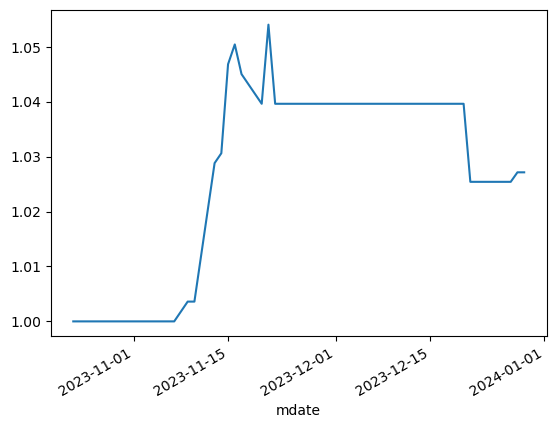

In [101]:
(TSMC['ret']+1).cumprod().plot()

In [102]:
TSMC['ret'].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0018018018018017834,
 0.0017985611510791255,
 0.0,
 0.025134649910233398,
 0.0017513134851139256,
 0.01573426573426584,
 0.0034423407917383297,
 -0.005145797598627766,
 -0.005172413793103403,
 0.013864818024263537,
 -0.013675213675213675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.013675213675213675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0016891891891892552,
 0.0]

## 2. 本益比河流圖

透過本益比及標準差的方式將本益比分成從過高到過低五組（從-2標準差到+2標準差），並搭配每日收盤價可以得知當階段本益比是否過高或者過低。

In [114]:
TSMC  = tejapi.get(
            'TRAIL/TAPRCD', 
            coid = '2330',
            mdate={'gte':'2023-09-01', 'lte':'2024-02-01'}, 
            opts={'columns': ['mdate','close_d', 'per_tse']}, 
            paginate=True)

In [115]:
TSMC

,mdate,close_d,per_tse
None,,,
0,2023-09-01,548.0,14.72
1,2023-09-04,557.0,14.96
2,2023-09-05,552.0,14.82
3,2023-09-06,550.0,14.77
4,2023-09-07,542.0,14.55
...,...,...,...
78,2023-12-25,581.0,16.82
79,2023-12-26,586.0,16.97
80,2023-12-27,592.0,17.14


In [117]:
##指標製作
TSMC['PE_std'] = round(TSMC['per_tse'].std(), 3)

In [118]:
TSMC['PE+1std'] = TSMC['per_tse'] + TSMC['PE_std']
TSMC['PE-1std'] = TSMC['per_tse'] - TSMC['PE_std']
TSMC['PE+2std'] = TSMC['per_tse'] + 2*TSMC['PE_std']
TSMC['PE-2std'] = TSMC['per_tse'] - 2*TSMC['PE_std']

In [119]:
TSMC

,mdate,close_d,per_tse,PE_std,PE+1std,PE-1std,PE+2std,PE-2std
None,,,,,,,,
0,2023-09-01,548.0,14.72,1.137,15.857,13.583,16.994,12.446
1,2023-09-04,557.0,14.96,1.137,16.097,13.823,17.234,12.686
2,2023-09-05,552.0,14.82,1.137,15.957,13.683,17.094,12.546
3,2023-09-06,550.0,14.77,1.137,15.907,13.633,17.044,12.496
4,2023-09-07,542.0,14.55,1.137,15.687,13.413,16.824,12.276
...,...,...,...,...,...,...,...,...
78,2023-12-25,581.0,16.82,1.137,17.957,15.683,19.094,14.546
79,2023-12-26,586.0,16.97,1.137,18.107,15.833,19.244,14.696
80,2023-12-27,592.0,17.14,1.137,18.277,16.003,19.414,14.866


In [120]:
TSMC = TSMC.set_index('mdate')

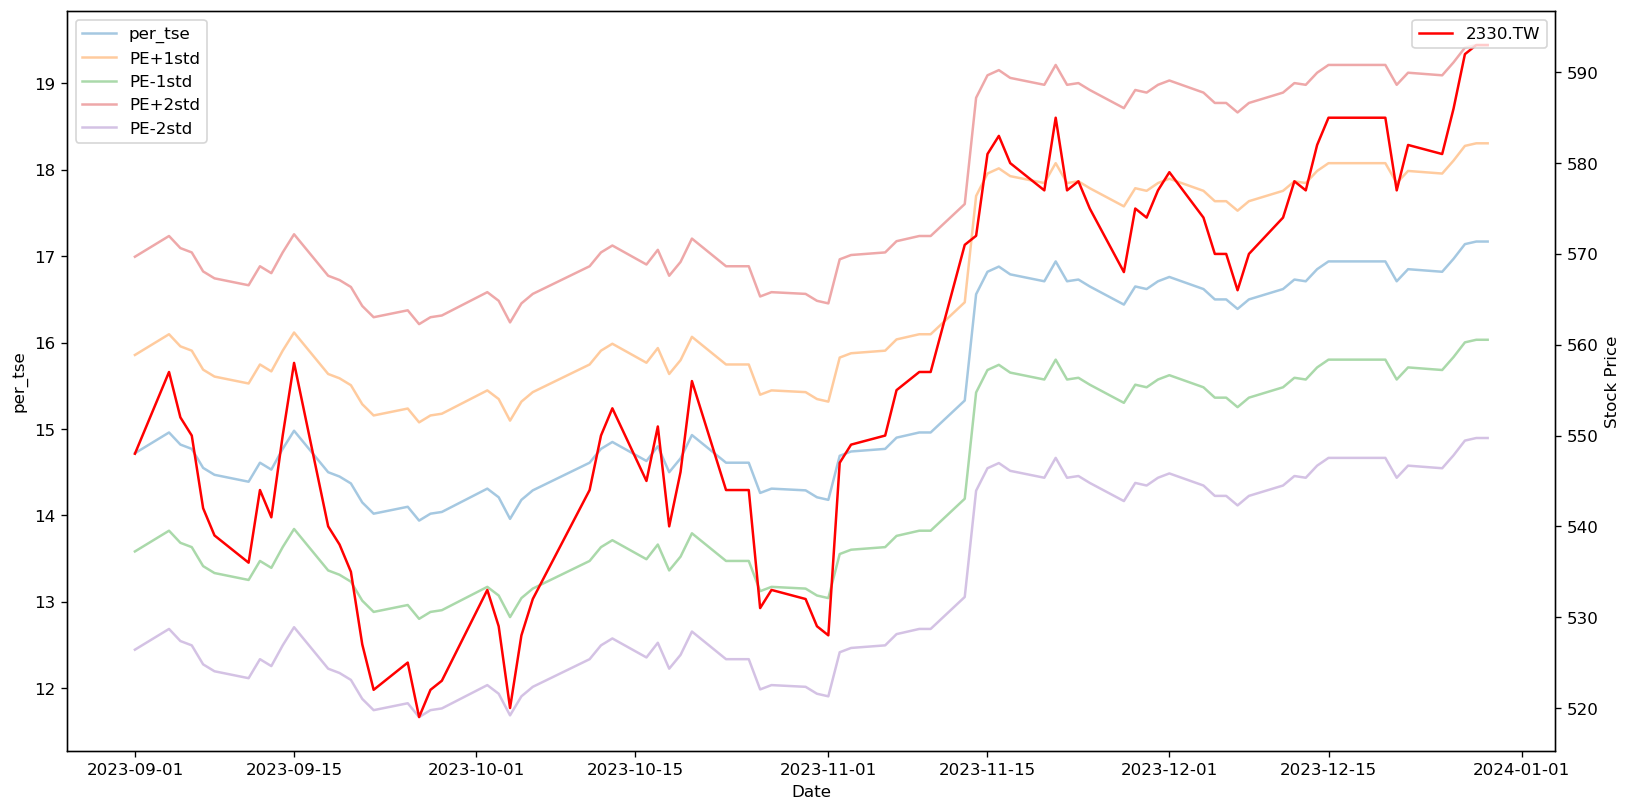

In [127]:
##圖型製作

fig, ax = plt.subplots(figsize= (16,8), dpi =120)
plt.plot(TSMC[['per_tse', 'PE+1std', 'PE-1std', 'PE+2std', 'PE-2std']], alpha=0.4)
plt.legend(['per_tse', 'PE+1std', 'PE-1std', 'PE+2std', 'PE-2std'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('per_tse')

ax2 = ax.twinx()
plt.plot(TSMC['close_d'], lw=1.5, color ='r', label='2330.TW')
plt.ylabel('Stock Price')
plt.legend(loc=1)
plt.show()

## 3. 大師策略

https://medium.com/tej-api-金融資料分析/實戰應用-三-三一投資管理公司-trinity-investment-management-價值型選股法則-bf13b041a059